In [82]:
import sys
import os
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, shapiro, mannwhitneyu, probplot

In [83]:
data_sheet = pd.read_excel('/mnt/c/Users/olutu/Downloads/record_of_interactions.xlsx', sheet_name='Sheet2')

In [84]:
data_sheet.head(3)

,N,participants_id,condition,baseline_robot_sentiment,story_related_emotion,postsession_robot_sentiment,story_liked,enjoyed_robot_conversation,activity_liked,future_robot_use,intended_use_case,Story Recall
0,1,MONPM16,AI,Happy,Happy,Happy,Yes,Yes,Yes,Yes,To clean my room,2.0
1,2,MONPM24,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,MONPM04,AI,NaN,Happy,Okay,Yes,Yes,Yes,Yes,Storytelling. Conversation.,1.0


In [85]:
likert_map = {
    "Very happy": 4,
    "Happy": 3,
    "Okay": 2,
    "Sad": 1,
    "Very sad": 0
}

In [86]:
data_sheet["baseline_robot_sentiment"] = data_sheet["baseline_robot_sentiment"].map(likert_map)
data_sheet["postsession_robot_sentiment"] = data_sheet["postsession_robot_sentiment"].map(likert_map)
data_sheet['story_related_emotion'] = data_sheet['story_related_emotion'].map(likert_map)


In [87]:
data_sheet.head()

,N,participants_id,condition,baseline_robot_sentiment,story_related_emotion,postsession_robot_sentiment,story_liked,enjoyed_robot_conversation,activity_liked,future_robot_use,intended_use_case,Story Recall
0,1,MONPM16,AI,3.0,3.0,3.0,Yes,Yes,Yes,Yes,To clean my room,2.0
1,2,MONPM24,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,MONPM04,AI,NaN,3.0,2.0,Yes,Yes,Yes,Yes,Storytelling. Conversation.,1.0
3,4,MONPM14,AI,NaN,2.0,3.0,Yes,Yes,Yes,No,I don't really understand what it's saying,0.0
4,5,TUEAM31,AI,NaN,2.0,2.0,No,No,No,No,NaN,NaN


In [88]:
#Baseline robot sentiment
baseline_robot_sentiment_ai = data_sheet[data_sheet['condition'] == 'AI']['baseline_robot_sentiment'].dropna().astype(int)
baseline_robot_sentiment_ctrl = data_sheet[data_sheet['condition'] == 'Control']['baseline_robot_sentiment'].dropna().astype(int)

In [89]:
# Story recall
ai_group_recall = data_sheet[data_sheet['condition'] == 'AI']['Story Recall'].dropna().astype(int)
control_group_recall = data_sheet[data_sheet['condition'] == 'Control']['Story Recall'].dropna().astype(int)

# Story-related emotion
story_related_emotion_ai = data_sheet[data_sheet['condition'] == 'AI']['story_related_emotion'].dropna().astype(int)
story_related_emotion_c = data_sheet[data_sheet['condition'] == 'Control']['story_related_emotion'].dropna().astype(int)

#Postsession robot sentiment
postRS_ai = data_sheet[data_sheet['condition'] == 'AI']['postsession_robot_sentiment'].dropna().astype(int)
postRS_ctrl = data_sheet[data_sheet['condition'] == 'Control']['postsession_robot_sentiment'].dropna().astype(int)

Shapiro-Wilk Test

Test story_recall for normal distribution

In [90]:
shapiro_BRS_AI, BRS_ai = shapiro(baseline_robot_sentiment_ai)
shapiro_BRS_C, BRS_ctrl = shapiro(baseline_robot_sentiment_ctrl)

In [91]:
x = len(baseline_robot_sentiment_ai)
y = len(baseline_robot_sentiment_ctrl)

print("Number of respondents in ai group (baseline robot sentiment):", x)
print("Number of respondents in control group (baseline robot sentiment):", y)
print("Number of respondents that reported a baseline robot sentiment: ", x + y)
# For AI Group
print("AI group: W.stat = %.3f, p = {%.5f}"% (shapiro_BRS_AI, BRS_ai))
print("Control group: W.stat = %.3f, p = {%.5f}"%(shapiro_BRS_C, BRS_ctrl))

Number of respondents in ai group (baseline robot sentiment): 15
Number of respondents in control group (baseline robot sentiment): 24
Number of respondents that reported a baseline robot sentiment:  39
AI group: W.stat = 0.771, p = {0.00162}
Control group: W.stat = 0.818, p = {0.00059}


In [92]:
shapiro_ai_recall, p_ai = shapiro(ai_group_recall)
shapiro_control_recall, p_ctrl = shapiro(control_group_recall)

In [93]:
x = len(ai_group_recall)
y = len(control_group_recall)

print("Number of participants in ai_recall group:", x)
print("Number of participants in control_recall group:", y)
print("Number of persons that attempted to recall the narrative: ", x +y)
# For AI Group
print("AI group: W.stat = %.3f, p = {%.5f}"% (shapiro_ai_recall, p_ai))
print("Control group: W.stat = %.3f, p = {%.5f}"%(shapiro_control_recall, p_ctrl))

Number of participants in ai_recall group: 24
Number of participants in control_recall group: 22
Number of persons that attempted to recall the narrative:  46
AI group: W.stat = 0.727, p = {0.00002}
Control group: W.stat = 0.738, p = {0.00006}


In [94]:
shapiro_PostRS_ai, p_PRS_ai=shapiro(postRS_ai)
shapiro_PostRS_ctrl, p_PRS_ctrl=shapiro(postRS_ctrl)

In [95]:
x = len(postRS_ai)
y = len(postRS_ctrl)

print("Number of participants reported post-session robot sentiment (AI):", x)
print("Number of participants report post-session robot sentiment (Control):", y)
print("Number of persons reported the post-session robot sentiment: ", x+y)
# For AI Group
print("AI group: W.stat = %.3f, p = {%.5f}"% (shapiro_PostRS_ai, p_PRS_ai))
# For the control group
print("Control group: W.stat = %.3f, p = {%.5f}"%(shapiro_PostRS_ctrl, p_PRS_ctrl))

Number of participants reported post-session robot sentiment (AI): 33
Number of participants report post-session robot sentiment (Control): 25
Number of persons reported the post-session robot sentiment:  58
AI group: W.stat = 0.800, p = {0.00003}
Control group: W.stat = 0.805, p = {0.00028}


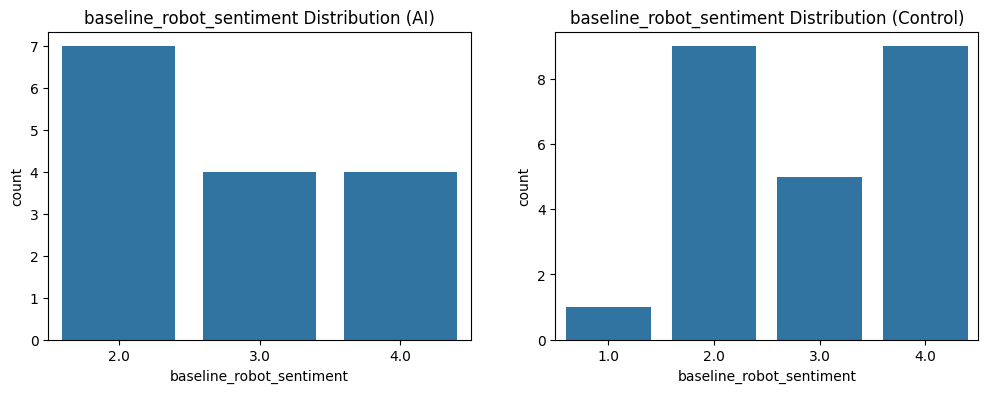

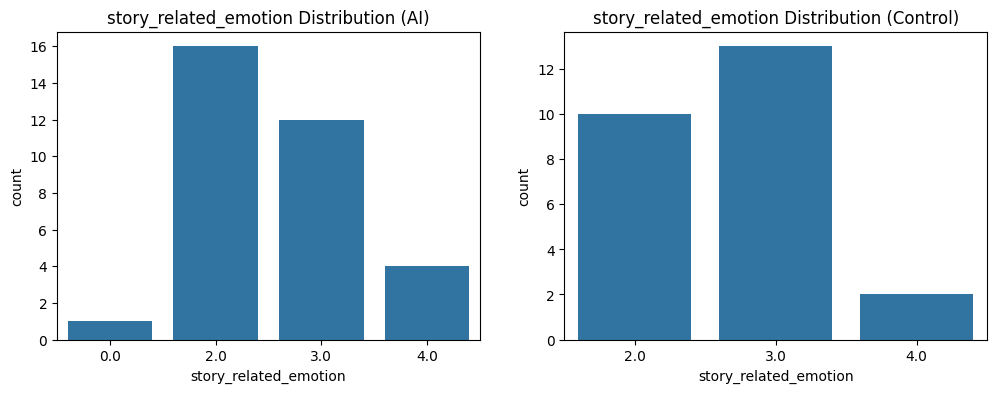

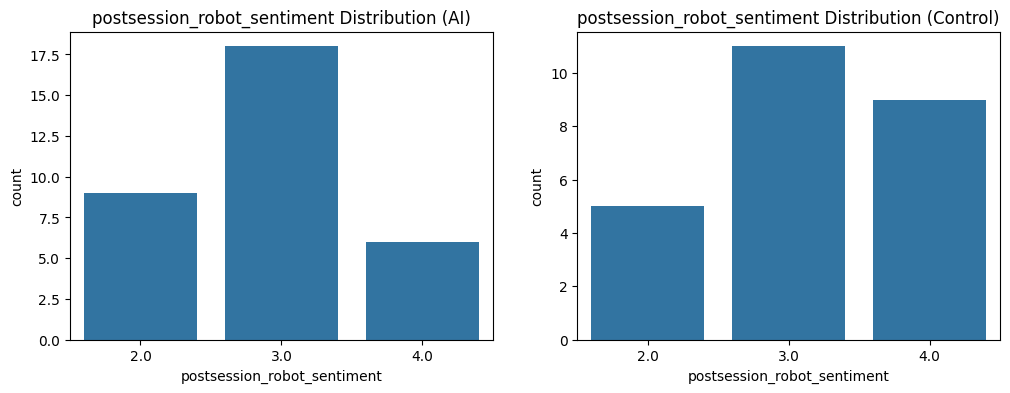

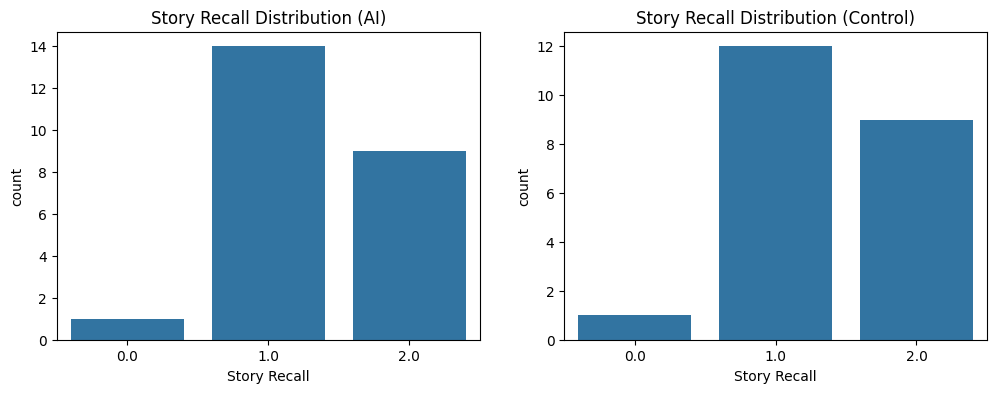

In [96]:
features = ['baseline_robot_sentiment', 'story_related_emotion', 'postsession_robot_sentiment', 'Story Recall']
group_col = 'condition'

for feature in features:
    plt.figure(figsize=(12, 4))

    # Histogram/barplot for AI group
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=data_sheet[data_sheet[group_col]=='AI'])
    plt.title(f"{feature} Distribution (AI)")

    # Histogram/barplot for Control group
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, data=data_sheet[data_sheet[group_col]=='Control'])
    plt.title(f"{feature} Distribution (Control)")
    plt.show()


TEST FOR THE DIFFERENCE BETWEEN THE TWO GROUPS (AI AND CONTROL)

In [60]:
# The Mann-Test for story related emotion
u_statistic, p_value = mannwhitneyu(ai_group_recall, control_group_recall, alternative='two-sided')

print("Mann-Whitney U-value (Story recall):", u_statistic)
print("p-value (Story recall):", p_value)

Mann-Whitney U-value (Story recall): 256.0
p-value (Story recall): 0.849929926310878


In [61]:
# The Mann-Test for story related emotion
u_statistic, p_value = mannwhitneyu(story_related_emotion_ai, story_related_emotion_c, alternative='two-sided')

print("Mann-Whitney U-value (Story related emotion):", u_statistic)
print("p-value (Story related emotion):", p_value)

Mann-Whitney U-value (Story related emotion): 374.0
p-value (Story related emotion): 0.5122634026791186


In [62]:
# The Mann-Test for baseline robot sentiment
u_statistic, p_value = mannwhitneyu(baseline_robot_sentiment_ai, baseline_robot_sentiment_ctrl, alternative='two-sided')

print("Mann-Whitney U-value (Baseline robot sentiment):", u_statistic)
print("p-value (Baseline robot sentiment):", p_value)


Mann-Whitney U-value (Baseline robot sentiment): 166.5
p-value (Baseline robot sentiment): 0.6894870030832928


In [63]:
# The Mann-Test for post-session robot sentiment
u_statistic, p_value = mannwhitneyu(postRS_ai, postRS_ctrl, alternative='two-sided')

print("Mann-Whitney U-value (Post session robot sentiment):", u_statistic)
print("p-value (post session robot sentiment):", p_value)

Mann-Whitney U-value (Post session robot sentiment): 334.5
p-value (post session robot sentiment): 0.1852918795506875


In [64]:
# List of four columns with yes/no answers
engagement_cols = [
    'story_liked',
    'enjoyed_robot_conversation',
    'activity_liked',
    'future_robot_use'
]

In [65]:
def yes_count2(row):
    return sum(str(row[col]).strip().lower().startswith('yes') for col in engagement_cols)

In [66]:
def yes_count(row):
    count = 0
    for col in engagement_cols:
        value = str(row[col]).strip().lower()
        if value.startswith('yes'):
            count += 1
    return count

In [67]:
data_sheet['engagement_score'] = data_sheet.apply(yes_count, axis=1)

In [68]:
data_sheet.columns

Index(['N', 'participants_id', 'condition', 'baseline_robot_sentiment',
       'story_related_emotion', 'postsession_robot_sentiment', 'story_liked',
       'enjoyed_robot_conversation', 'activity_liked', 'future_robot_use',
       'intended_use_case', 'Story Recall', 'engagement_score'],
      dtype='object')

In [69]:
data_sheet[['condition', 'engagement_score']].head()

,condition,engagement_score
0,AI,4
1,AI,0
2,AI,4
3,AI,3
4,AI,0


In [70]:
# Separate scores by condition
engagement_ai = data_sheet[data_sheet['condition'] == 'AI']['engagement_score'].dropna()
engagement_control = data_sheet[data_sheet['condition'] == 'Control']['engagement_score'].dropna()

In [71]:
engagement_ai.head()

0    4
1    0
2    4
3    3
4    0
Name: engagement_score, dtype: int64

In [72]:
engagement_control.head()

22    4
23    4
24    4
25    0
26    4
Name: engagement_score, dtype: int64

In [73]:
print("Number of participants in Control group (engagement score):", engagement_control.size)
print("Number of participants in AI group (engagement score):", engagement_ai.size)

Number of participants in Control group (engagement score): 30
Number of participants in AI group (engagement score): 35


In [74]:
u_statistic, p_value = mannwhitneyu(engagement_ai, engagement_control, alternative='two-sided')

In [75]:
print("Mann-Whitney U-value (engagement):", u_statistic)
print("p-value (engagement):", p_value)

Mann-Whitney U-value (engagement): 511.0
p-value (engagement): 0.8176616018230672


A p-value >> 0.05 s there indicates no significant difference in overall engagement between the AI and Control groups based on the Mann-Whitney U test.

,total_levenshtein,average_levenshtein,median_levenshtein,stddev_levenshtein,average_wer,event_count,session
0,135,19.285714,12,16.157389,0.893843,7,FRIAM02
1,178,25.428571,17,19.812385,0.889113,7,FRIAM07
2,247,35.285714,23,34.457901,1.933566,7,FRIAM10
3,84,12.000000,7,14.928401,0.599098,7,FRIAM16
4,119,17.000000,8,16.388149,0.725076,7,FRIAM23
5,220,31.428571,31,17.078450,22.924603,7,MONPM04
6,194,27.714286,11,28.847948,26.142857,7,MONPM24
7,89,12.714286,13,7.905049,0.630937,7,THURAM02
8,63,9.000000,8,5.451081,2.254955,7,THURAM05
9,71,10.142857,5,7.953949,1.081349,7,THURAM24


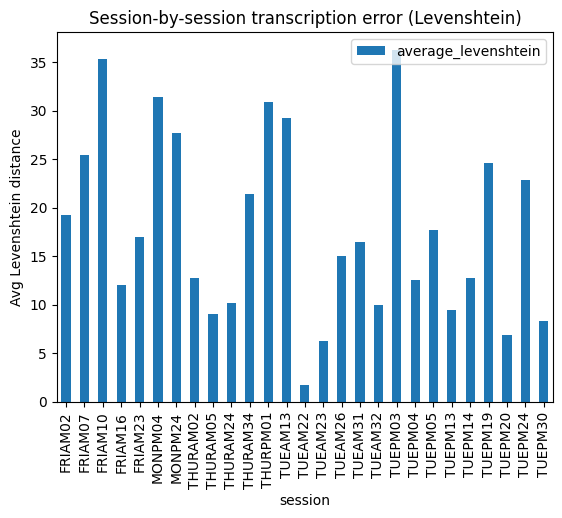

In [76]:
import os
from levenshtein_WER import compute_session_metrics

FOLDER = "/mnt/c/Documents and Settings/olutu/Downloads/wer_processing_transcriptions/"
results = []

for filename in os.listdir(FOLDER):
    if filename.endswith("_Comparison.txt"):
        metrics = compute_session_metrics(os.path.join(FOLDER, filename))
        if metrics is not None:
            metrics["session"] = filename.replace("_Comparison.txt", "")
            results.append(metrics)

df = pd.DataFrame(results)
display(df)  # ready for plots, stats, etc.

# Plotting average Levenshtein distance per session
import matplotlib.pyplot as plt
df.plot.bar(x='session', y='average_levenshtein')
plt.ylabel("Avg Levenshtein distance")
plt.title("Session-by-session transcription error (Levenshtein)")
plt.show()


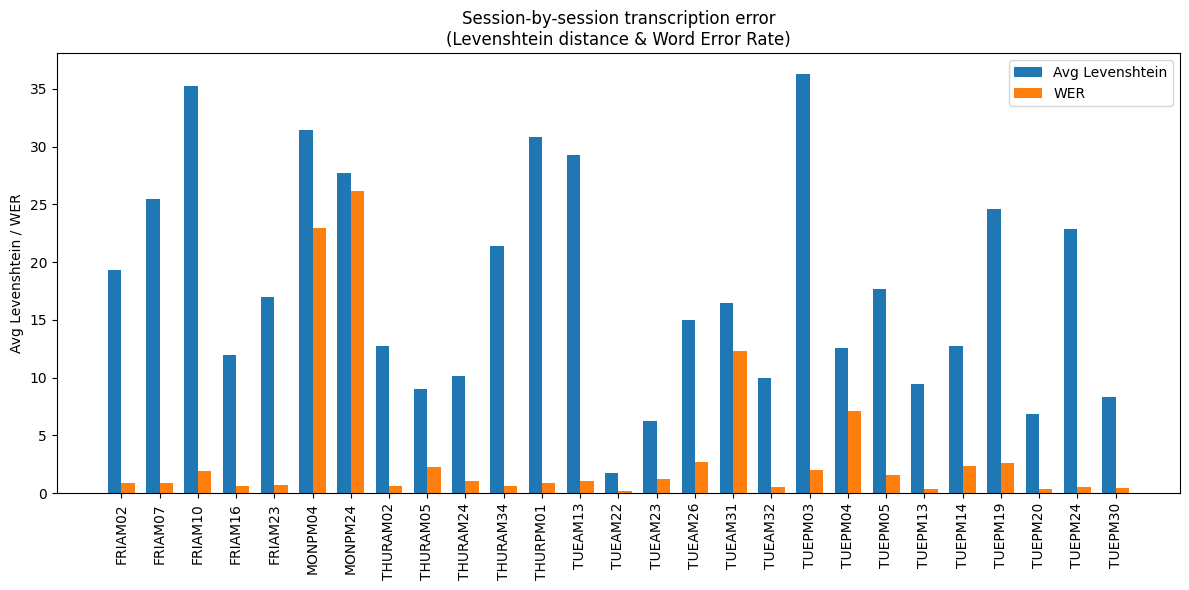

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Normalize WER to percentage, if desired
df["average_wer_pct"] = df["average_wer"] #* 100

# Set up positions for side-by-side bars
ind = np.arange(len(df))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12,6))

bar1 = ax1.bar(ind - width/2, df["average_levenshtein"], width, label='Avg Levenshtein')
bar2 = ax1.bar(ind + width/2, df["average_wer_pct"], width, label='WER')

ax1.set_xticks(ind)
ax1.set_xticklabels(df["session"], rotation=90)
ax1.set_ylabel("Avg Levenshtein / WER")
ax1.set_title("Session-by-session transcription error\n(Levenshtein distance & Word Error Rate)")
ax1.legend()

fig.tight_layout()
plt.show()


In [108]:
ai_participants = data_sheet[data_sheet['condition'] == 'AI']['participants_id'].tolist()

In [109]:
ai_participants

['MONPM16',
 'MONPM24',
 'MONPM04',
 'MONPM14',
 'TUEAM31',
 'TUEAM30',
 'TUEAM13',
 'TUEAM22',
 'TUEAM23',
 'TUEAM26',
 'TUEAM11',
 'TUEAM32',
 'TUEPM13',
 'TUEPM19',
 'TUEPM20',
 'TUEPM03',
 'TUEPM05',
 'TUEPM04',
 'TUEPM14',
 'TUEPM24',
 'TUEPM30',
 'THURAM24',
 'THURAM34',
 'THURAM05',
 'THURAM02',
 'THURPM24',
 'THURPM01',
 'THURPM23',
 'THURPM30',
 'FRIAM11',
 'FRIAM16',
 'FRIAM07',
 'FRIAM10',
 'FRIAM23',
 'FRIAM02']

In [110]:
print("Number of participants in AI group:", len(ai_participants))

Number of participants in AI group: 35


In [114]:
from lag_calculator import extract_lag_times

def summarize_lag_stats(file_path):
    lag_results = extract_lag_times(file_path)
    p2c = [entry['lag_seconds'] for entry in lag_results if entry['type'] == 'Pepper to Child']
    c2p = [entry['lag_seconds'] for entry in lag_results if entry['type'] == 'Child to Pepper']

    def summary(lags):
        return {
            'count': len(lags),
            'mean': statistics.mean(lags) if lags else None,
            'median': statistics.median(lags) if lags else None,
            'std': statistics.stdev(lags) if len(lags) > 1 else None,
            'min': min(lags) if lags else None,
            'max': max(lags) if lags else None
        }

    return { 
        'Pepper_to_Child': summary(p2c), 
        'Child_to_Pepper': summary(c2p) 
    }

transcript_directory = '/mnt/c/Users/olutu/Downloads/cleaned_transcriptions/'
rows = []
skipped = 0

for each_participant_id in ai_participants:
    fname = each_participant_id + ".txt"
    file_path = os.path.join(transcript_directory, fname)
    if os.path.exists(file_path):
        stats = summarize_lag_stats(file_path)
        row = {
            'file': fname,
            **{f'P2C_{key}': val for key, val in stats['Pepper_to_Child'].items()},
            **{f'C2P_{key}': val for key, val in stats['Child_to_Pepper'].items()}
        }
        rows.append(row)
    else:
        skipped += 1

stats_df = pd.DataFrame(rows)
print("Skipped files:", skipped)
display(stats_df)

Skipped files: 4


,file,P2C_count,P2C_mean,P2C_median,P2C_std,P2C_min,P2C_max,C2P_count,C2P_mean,C2P_median,C2P_std,C2P_min,C2P_max
0,MONPM16.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,MONPM24.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,MONPM04.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,MONPM14.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,TUEAM31.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5,TUEAM30.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
6,TUEAM13.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
7,TUEAM22.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
8,TUEAM23.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
9,TUEAM26.txt,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
